In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
ans = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
print(ans.head(3))

     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570


In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.sample(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
960,961,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,116500
953,954,60,RL,NaN,11075,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2008,WD,Normal,172000
352,353,50,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,ConLw,Normal,95000
1023,1024,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,191000
159,160,60,RL,134.0,19378,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,320000


In [4]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

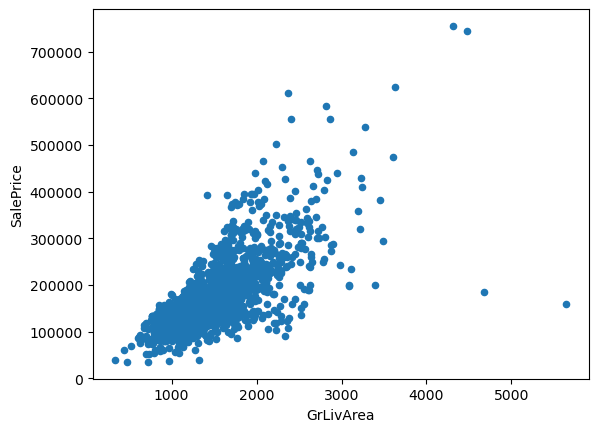

In [6]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'],df[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

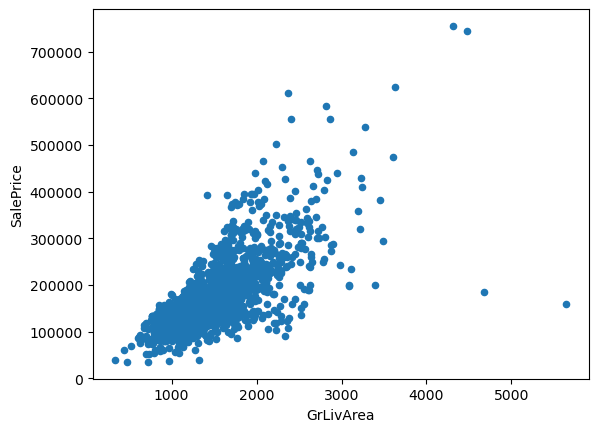

In [7]:
var =  'GrLivArea'
data = pd.concat([df['SalePrice'],df[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

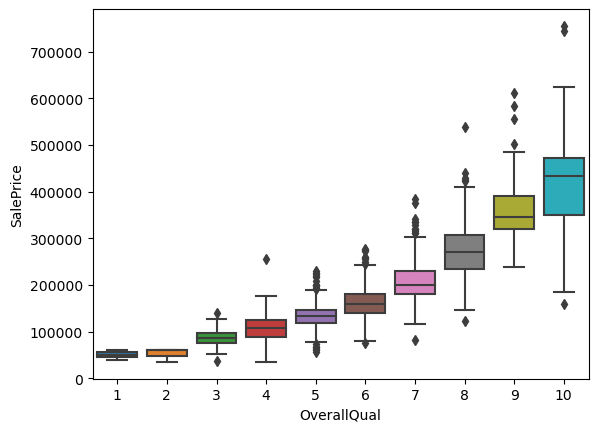

In [9]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'],df[var]],axis=1)
sns.boxplot(x=var,y='SalePrice',data = data)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

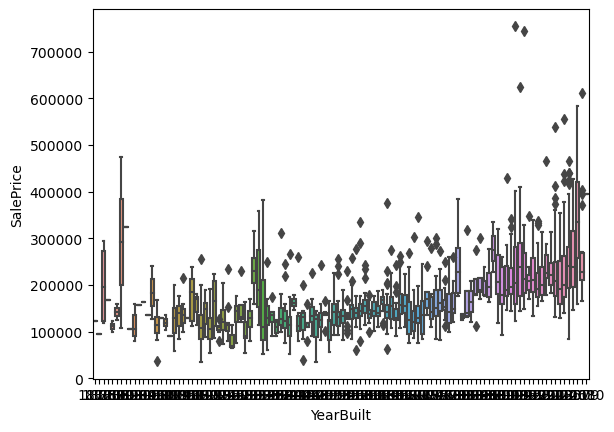

In [10]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'],df[var]],axis=1)
sns.boxplot(x=var,y='SalePrice',data = data)

In [11]:
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


<AxesSubplot:>

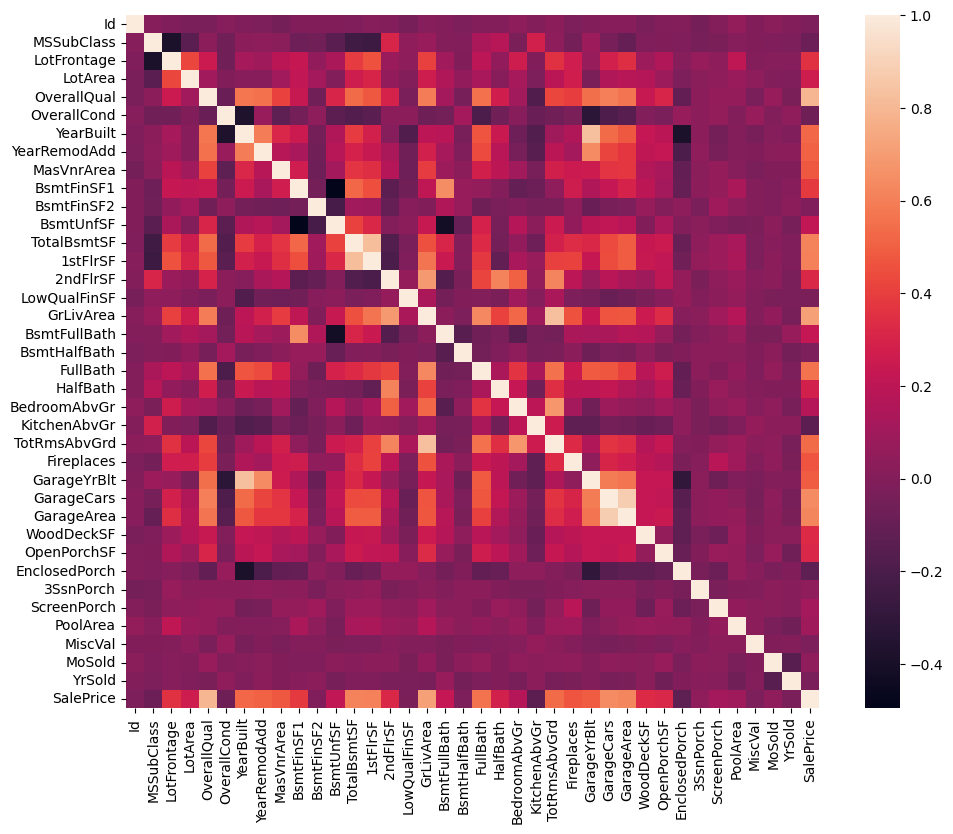

In [12]:
plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),square=True)

In [13]:
k = 10
cols = df.corr().nlargest(k,'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

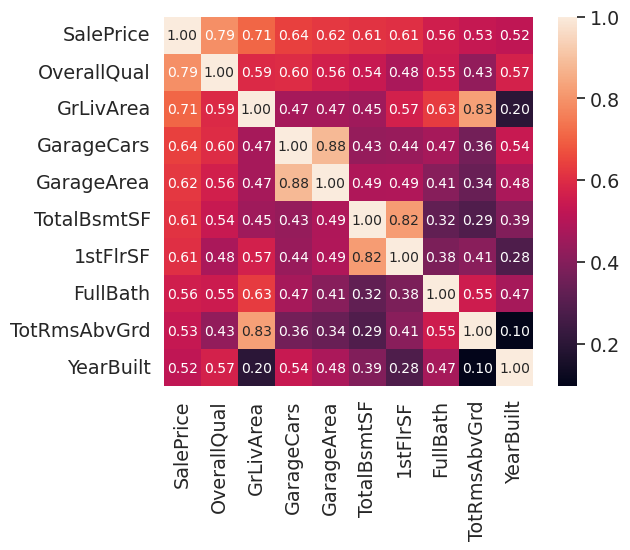

In [14]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

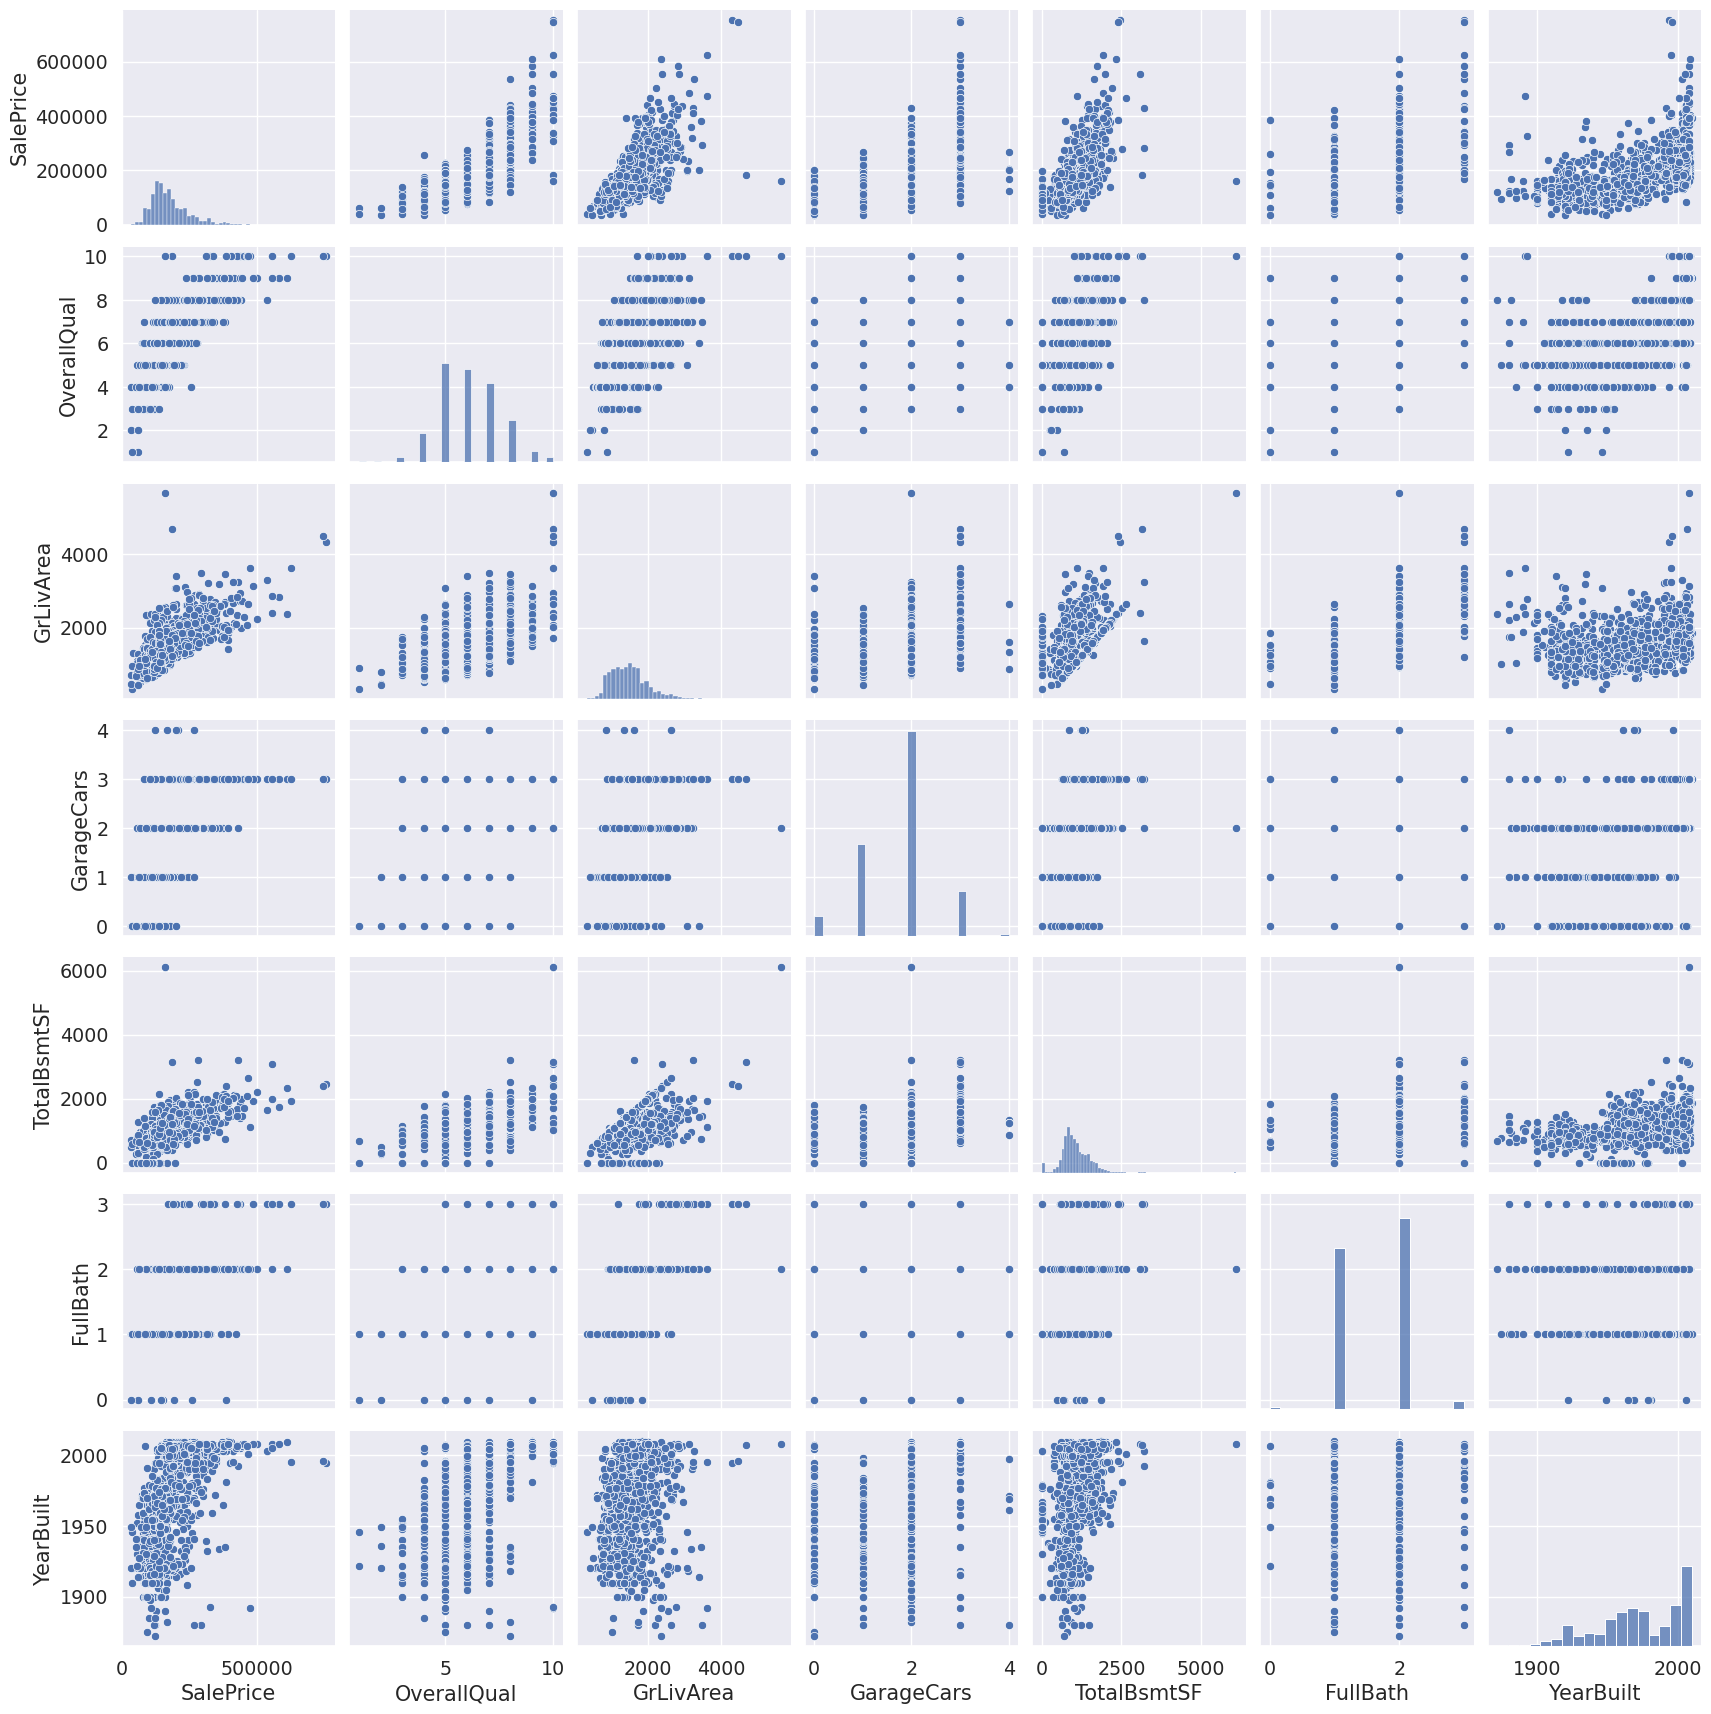

In [15]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5)
plt.show();

In [16]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total,percent],axis=1,keys = ['total','precent'] )
missing

,total,precent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


In [17]:
df2 = df.drop(missing[missing['total']>=1].index,axis=1)
df2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
df2.isnull().sum().max()

0

In [19]:
from sklearn.preprocessing import StandardScaler 
saleprice_scaled = StandardScaler().fit_transform(df2['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,:].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,:].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]]

outer range (high) of the distribution:
[[[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]

 [[0.34727322]]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


**well that's how you write something in notebook :) .**

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

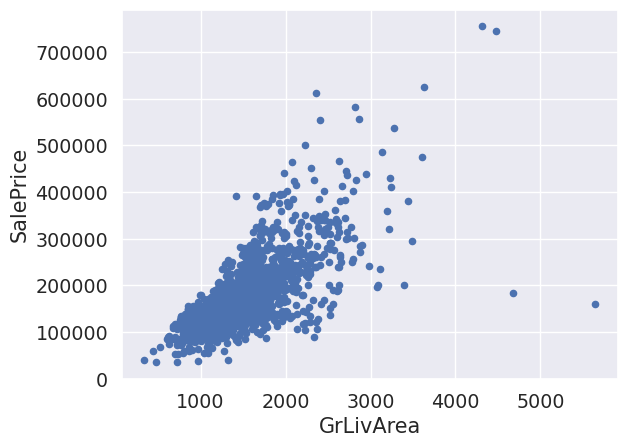

In [20]:
var = 'GrLivArea'
data = pd.concat([df2['SalePrice'],df2[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

In [21]:
# df2[df2['GrLivArea'].argsort()][:]

In [22]:
df3 = df2.sort_values(by='GrLivArea',ascending=False)
df3['GrLivArea']
df4 = df3.drop(1298)
df4 = df4.drop(523)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

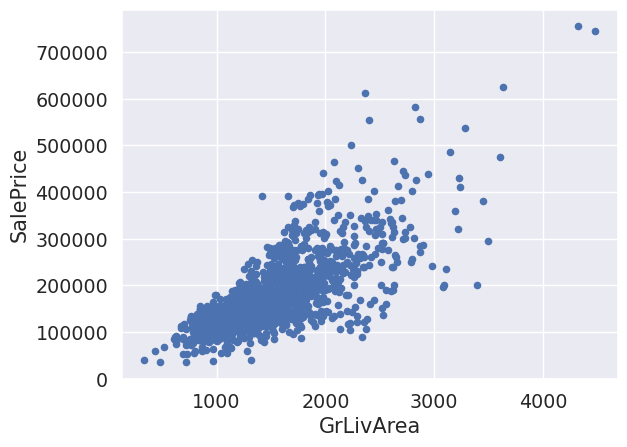

In [23]:
var = 'GrLivArea'
data = pd.concat([df4['SalePrice'],df4[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

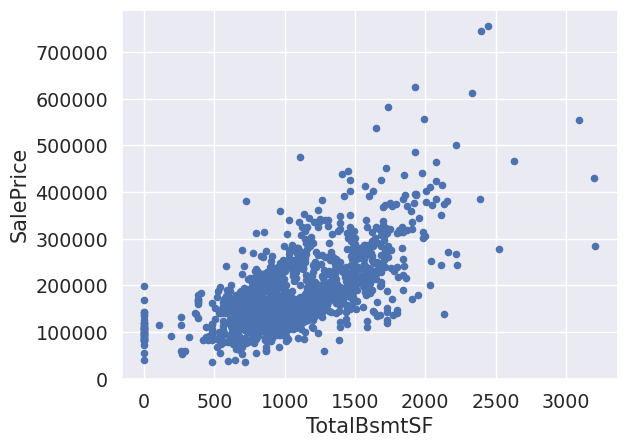

In [24]:
var = 'TotalBsmtSF'
data = pd.concat([df4[var],df4['SalePrice']],axis=1)
data.plot.scatter(x=var,y='SalePrice')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


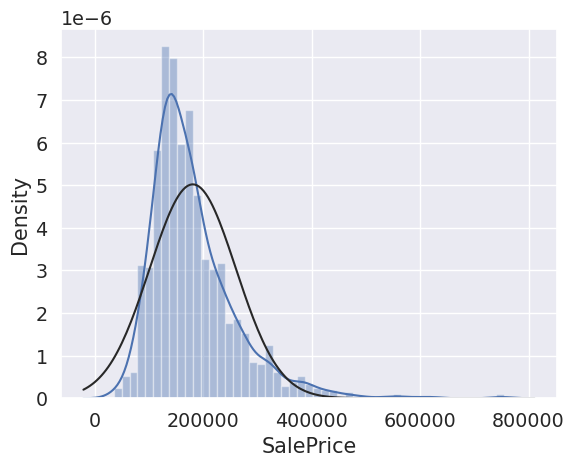

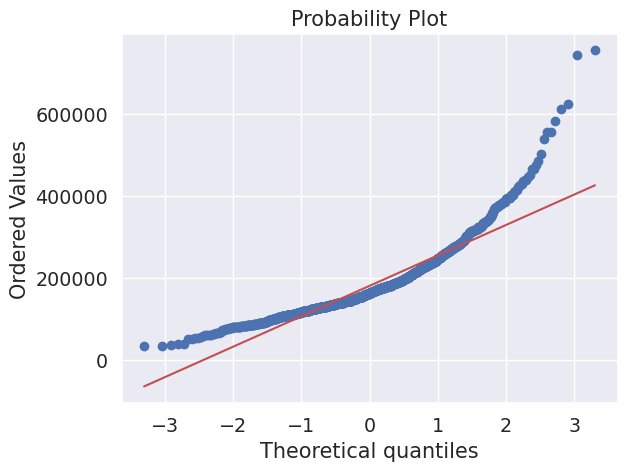

In [25]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df4['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df4['SalePrice'], plot=plt)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


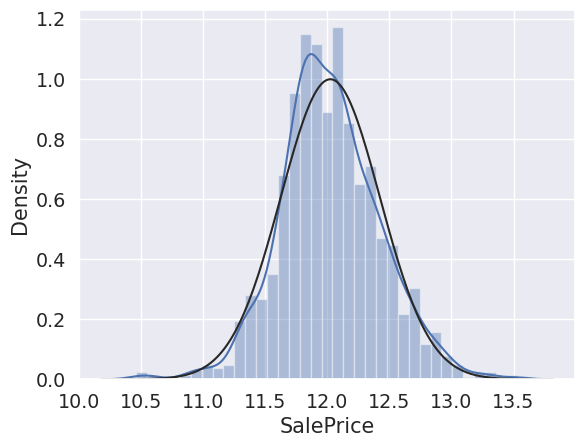

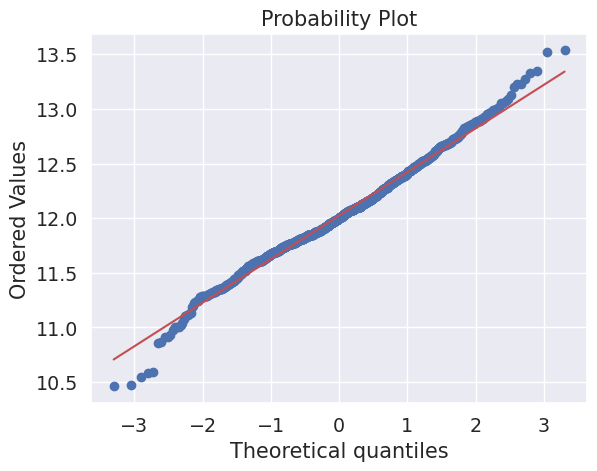

In [26]:
df4['SalePrice'] = np.log(df4['SalePrice'])
sns.distplot(df4['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df4['SalePrice'], plot=plt)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


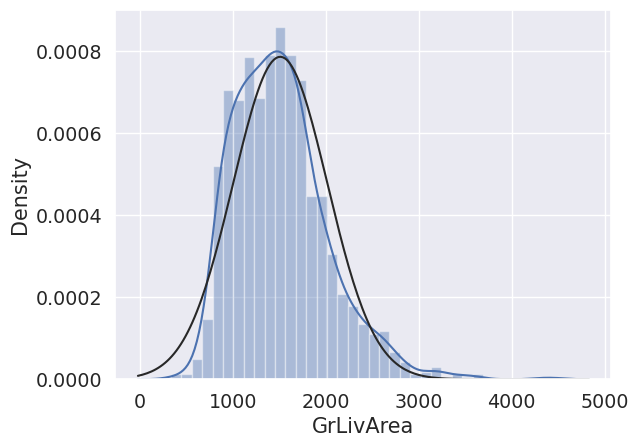

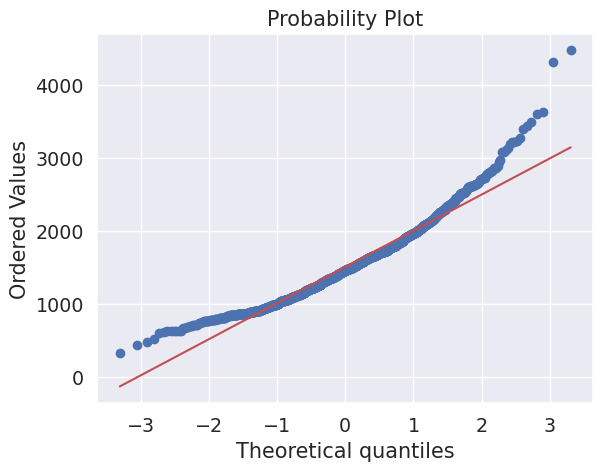

In [27]:
var = 'GrLivArea'
sns.distplot(df4[var],fit=norm)
fig = plt.figure()
res = stats.probplot(df4[var], plot=plt)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


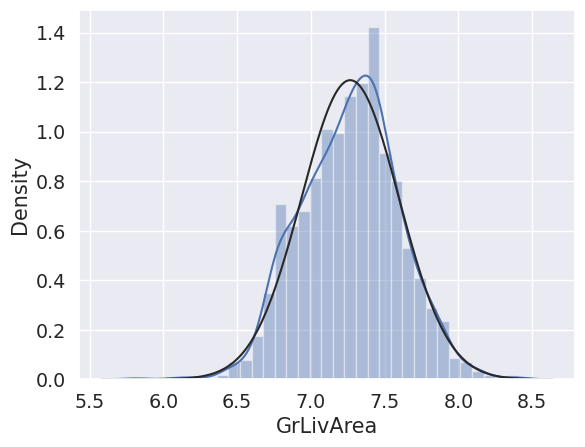

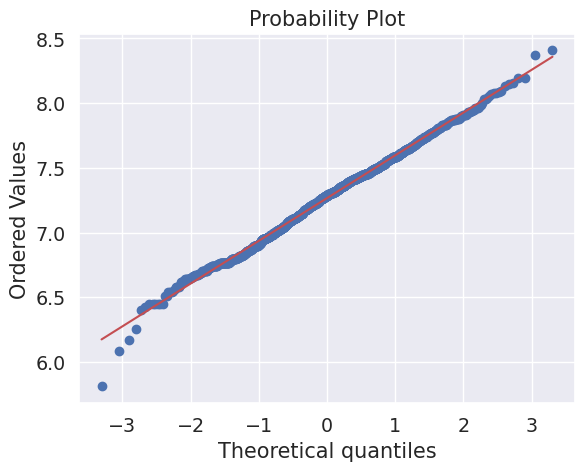

In [28]:
df4['GrLivArea'] = np.log(df4['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df4['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df4['GrLivArea'], plot=plt)

In [29]:
# create column for new variable (one is enough because it's a binary categorical feature)
# if area>0 it gets 1, for area==0 it gets 0
# df4['HasBsmt'] = pd.Series(len(df4['TotalBsmtSF']), index=df4.index)
# df4['HasBsmt'] = 0 
# df4.loc[df4['TotalBsmtSF']>0,'HasBsmt'] = 1

In [30]:
df4['HasBsmt'] = pd.Series(len(df4['TotalBsmtSF']),index=df4.index)
df4['HasBsmt'] = 0
df4.loc[df4['TotalBsmtSF']>0,'HasBsmt'] = 1


In [31]:
df4['HasBsmt'].describe()

count    1458.000000
mean        0.974623
std         0.157322
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HasBsmt, dtype: float64

In [32]:
df4.loc[df4['HasBsmt']==1,'TotalBsmtSF'] = np.log(df4['TotalBsmtSF'])
df4['TotalBsmtSF'].describe()

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    1458.000000
mean        6.747291
std         1.144801
min         0.000000
25%         6.678656
50%         6.898715
75%         7.167616
max         8.072779
Name: TotalBsmtSF, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

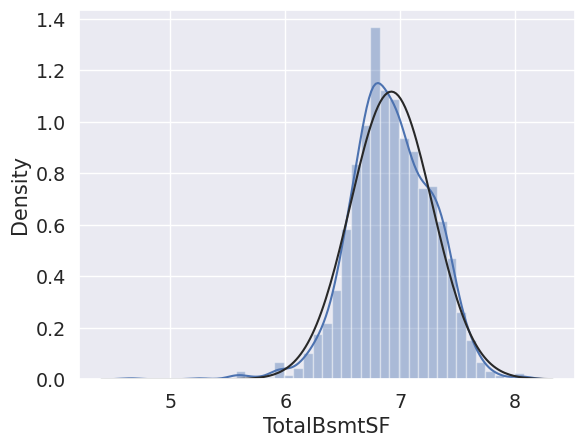

In [33]:
sns.distplot(df4.loc[df4['HasBsmt']==1,'TotalBsmtSF'],fit=norm)

In [34]:
df5 = df4[['YearBuilt','OverallQual','TotalBsmtSF','GrLivArea']]
df5 = pd.get_dummies(df5)
df5.head(5)
x = df5
y= df4['SalePrice']

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [36]:
print(reg.score(x, y))


0.8144462819964022


In [37]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [38]:
x_test = data[['YearBuilt','OverallQual','TotalBsmtSF','GrLivArea']]
# reg.predict(x_test)
z = x_test['TotalBsmtSF'].mean()
x_test.fillna(z,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [39]:
y_pred = pd.Series(reg.predict(x_test))
ID = data['Id']
sol = pd.concat([ID,y_pred],keys=['Id','SalePrice'],axis=1)
sol

,Id,SalePrice
0,1461,500.523461
1,1462,739.477256
2,1463,878.232765
3,1464,865.453384
4,1465,712.842559
...,...,...
1454,2915,588.298863
1455,2916,588.298863
1456,2917,681.579544
1457,2918,539.699003


In [40]:
sol.to_csv('house.csv',index=False)